# Software profesional en Acústica 2024-25 (M2i)

*This notebook contains a modification of the notebook [FEM_example_meshes_2D](https://github.com/spatialaudio/computational_acoustics/blob/master/FEM_example_meshes_2D.ipynb), created by Sascha Spors, Frank Schultz, Computational Acoustics Examples, 2018. The text/images are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/). The code is released under the [MIT license](https://opensource.org/licenses/MIT).*

First, we need to install on the fly FEniCS 2019.1.0 using the [FEM on Colab](https://fem-on-colab.github.io/packages.html) install script:

In [1]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"

# Two-Dimensional Example Meshes

This notebook shows some examples for two-dimensional meshes as used in the [Finite Element Method](https://en.wikipedia.org/wiki/Finite_element_method) (FEM) for spatial discretization. The meshes are generated by [FEniCS](https://fenicsproject.org/), an open-source framework for numerical solution of PDEs.

In [2]:
import dolfin
import mshr
import matplotlib.pyplot as plt

def plot_mesh(mesh):
    fig = plt.figure(figsize=(10,10))
    fig = dolfin.plot(mesh)
    plt.xlabel(r'$x$ / m')
    plt.ylabel(r'$y$ / m')

## Rectangular Domains

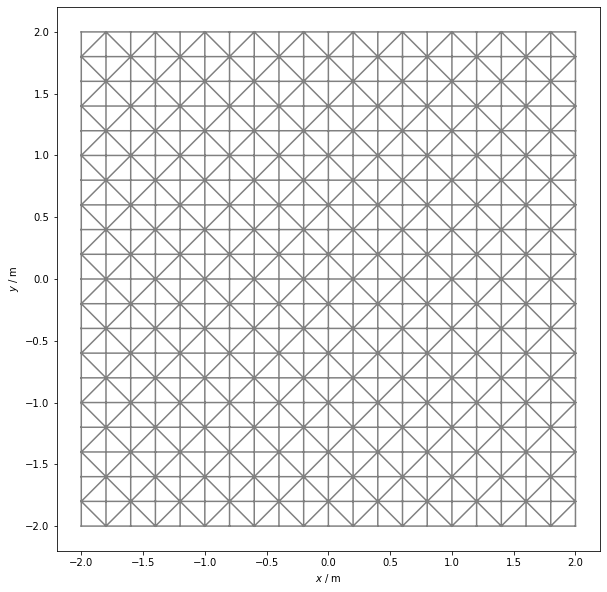

In [3]:
mesh = dolfin.RectangleMesh(dolfin.Point(-2,-2), dolfin.Point(2, 2), 20, 20, "right/left")
plot_mesh(mesh);

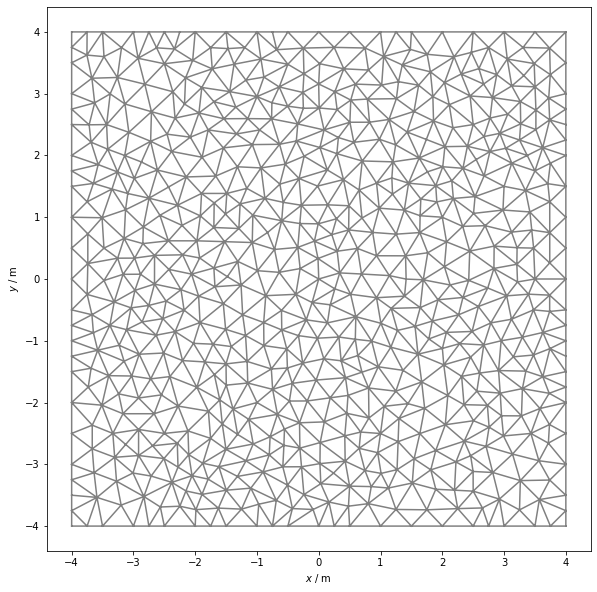

In [4]:
domain = mshr.Rectangle(dolfin.Point(-4,-4), dolfin.Point(4,4))
mesh = mshr.generate_mesh(domain, 20)
plot_mesh(mesh);

## Coupled Rectangular Domains

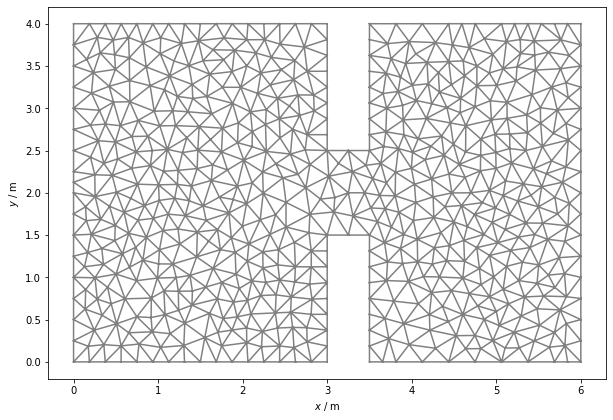

In [5]:
domain = mshr.Rectangle(dolfin.Point(0, 0), dolfin.Point(3,4)) + \
         mshr.Rectangle(dolfin.Point(3, 1.5), dolfin.Point(3.5, 2.5)) + \
         mshr.Rectangle(dolfin.Point(3.5, 0), dolfin.Point(6, 4))
mesh = mshr.generate_mesh(domain, 20)

plot_mesh(mesh);

## Domains with Holes

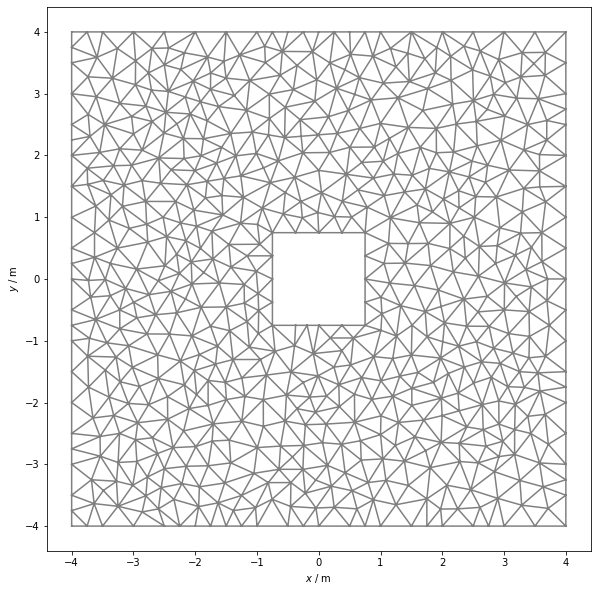

In [6]:
domain = mshr.Rectangle(dolfin.Point(-4,-4), dolfin.Point(4,4)) - \
         mshr.Rectangle(dolfin.Point(-.75,-.75), dolfin.Point(.75,.75))
mesh = mshr.generate_mesh(domain, 20)
plot_mesh(mesh);

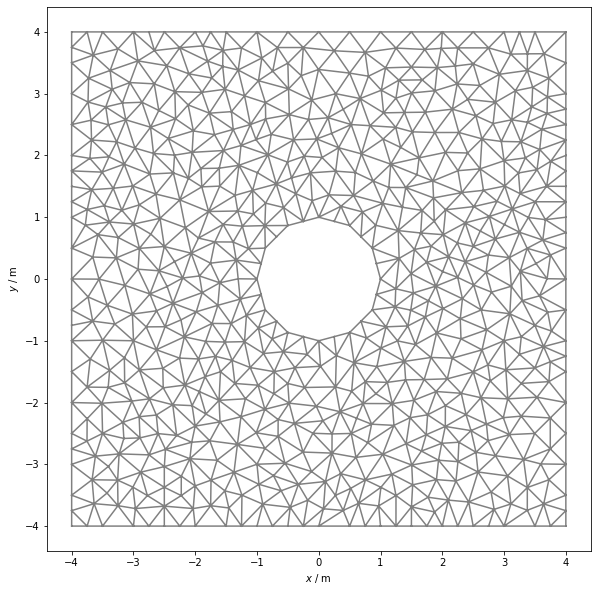

In [7]:
domain = mshr.Rectangle(dolfin.Point(-4,-4), dolfin.Point(4,4)) - \
         mshr.Circle(dolfin.Point(0,0), 1)
mesh = mshr.generate_mesh(domain, 20)
plot_mesh(mesh);

## Polygonial Domains

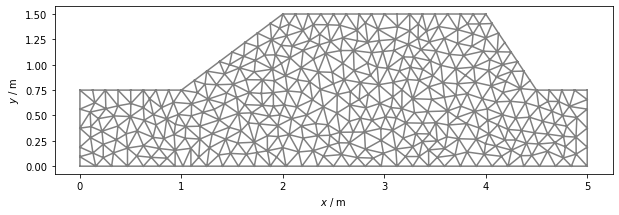

In [8]:
domain_vertices = [dolfin.Point(0.0, 0.0),
                  dolfin.Point(5.0, 0.0),
                  dolfin.Point(5.0, 0.75),
                  dolfin.Point(4.5, 0.75),
                  dolfin.Point(4.0, 1.50),
                  dolfin.Point(2.0, 1.50),
                  dolfin.Point(1.0, 0.75),
                  dolfin.Point(0.0, 0.75),
                  dolfin.Point(0.0, 0.0)]

domain = mshr.Polygon(domain_vertices)
mesh = mshr.generate_mesh(domain, 20)

plot_mesh(mesh);

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).